In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from bs4 import BeautifulSoup
import requests
import re

In [47]:
nrovuelos = pd.read_csv('./data/bm/API.csv')

In [48]:
nrovuelos.drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)

In [49]:
nrovuelos = nrovuelos.T

In [50]:
nrovuelos.drop(['2021', 'Unnamed: 66'], axis=0, inplace=True)

In [51]:
nrovuelos

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,562927.000000,22770.000,157788.000000,15482.0,306.0,NaN,1.476812e+06,463947.000,149334.0,...,NaN,248580.0,9037.000,3.468796e+07,13805.0,NaN,4538.0,212865.000,8094.0000,4231.0
2017,2132.0,630147.000000,24207.000,151203.000000,13494.0,1904.0,NaN,1.503553e+06,459137.000,146631.0,...,NaN,264548.0,12287.000,3.570384e+07,6098.0,NaN,1669.0,216275.000,9020.0000,3444.0
2018,2276.0,705127.484622,10454.000,157126.726524,13978.0,2935.0,NaN,1.539593e+06,455956.000,161862.0,...,NaN,283787.0,11723.000,3.682823e+07,6848.0,NaN,2342.0,234156.000,1241.0000,3444.0
2019,NaN,717795.300000,7334.000,158874.790000,13647.0,2558.0,NaN,1.599362e+06,426157.272,163106.0,...,NaN,332029.0,13866.000,3.920377e+07,6220.0,NaN,NaN,248747.000,1298.0000,NaN


In [52]:
nrovuelos = nrovuelos.sum(axis=1)

In [53]:
nrovuelos = pd.DataFrame(nrovuelos)

In [54]:
nrovuelos['year'] = nrovuelos.index

In [55]:
nrovuelos.reset_index(drop=True, inplace=True)

In [56]:
nrovuelos['year'] = pd.to_datetime(nrovuelos['year'], format='%Y')

In [60]:
nrovuelos = nrovuelos.set_index('year')

In [62]:
nrovuelos.columns = ['nrovuelos']

In [67]:
nrovuelos = nrovuelos.loc[nrovuelos['nrovuelos'] >0,:]

<AxesSubplot:xlabel='year'>

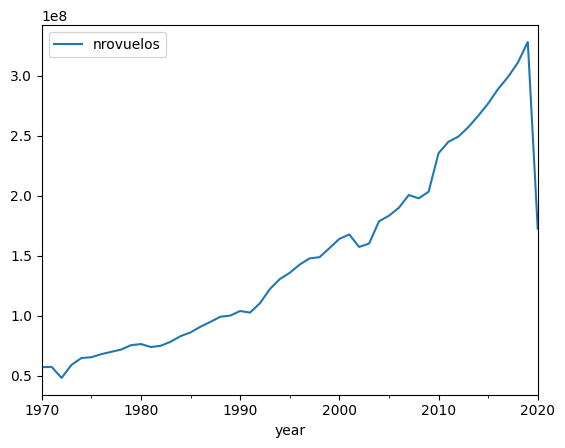

In [68]:
nrovuelos.plot()

In [74]:
nrovuelos['year'] = nrovuelos.index

/var/folders/4p/6ylhcrld3b708sdcx7l8k0_w0000gn/T/ipykernel_27659/3728344926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrovuelos['year'] = nrovuelos.index


In [75]:
nrovuelos

,nrovuelos,year
year,,
1970-01-01,5.717280e+07,1970-01-01
1971-01-01,5.747050e+07,1971-01-01
1972-01-01,4.824680e+07,1972-01-01
1973-01-01,5.909760e+07,1973-01-01
1974-01-01,6.482020e+07,1974-01-01
1975-01-01,6.548990e+07,1975-01-01
1976-01-01,6.806190e+07,1976-01-01
1977-01-01,6.997510e+07,1977-01-01
1978-01-01,7.186290e+07,1978-01-01


In [76]:
from sqlalchemy import create_engine

def ConnectSQL():
    try:
        engine = create_engine("mysql+pymysql://{user}:{pw}@{address}/{db}"
                    .format(user="pythonuser",
                            address = '192.168.0.6:3306',
                            pw="borito333.",
                            db="lab3"))
        return engine
    except:
        print('Error connecting to SQL')


In [77]:
# Load new files from S3 Bucket to SQL
# NEED TO CHECK IF FILES ALREADY EXISTS IN FOLDER
def UploadData(df, table_name):
    engine = ConnectSQL()
    df.to_sql(table_name, con=engine, if_exists='append', index=False)
    print('New files uploaded to SQL')


In [78]:
UploadData(nrovuelos, 'historical')

New files uploaded to SQL
